In [1]:
from Source_code.Models_and_solvers import open_circuit, closed_circuit
from Source_code.Robustness import draw_dimer_explore, tolerance_score_heatmap, tolerance_score_heatmap3D
from Source_code.Controllability import draw_dimer_response, scenario, draw_trimer_response, controllability_heatmap
from Source_code.Performance_evaluation import performance, performance_ss, performance_d, save_data, read_data
from Source_code.Multiple_comparison import variables, scores_for_radar
from itertools import permutations as perm 
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# I. Stoichiometry Maintenance of Heterodimer

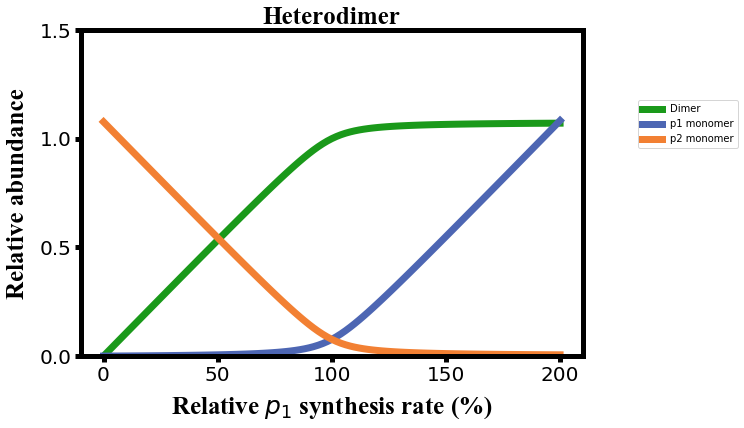

Normalized dimer (nM):	 3370.0139910019852
Upper limit: 1.9889795918367348
Lower limit: 0.5055102040816327
Tolerance score: 1.9762163539459525


In [2]:
draw_dimer_explore(lam1=0.027, lam2=0.027, lam3=0.027, K=0.05, c2=98, fold=2, lam12_equal=True, normalize=True)

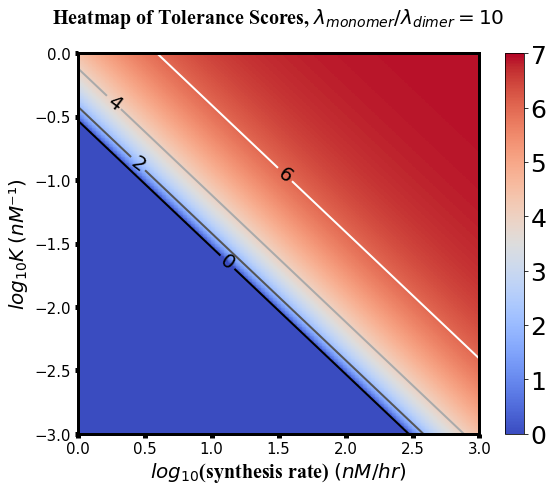

In [3]:
tolerance_score_heatmap(lam1=0.27, lam3=0.027,c_min=1,c_max=1000,k_min=0.001,k_max=1,resolution1 = 500, resolution2=500)

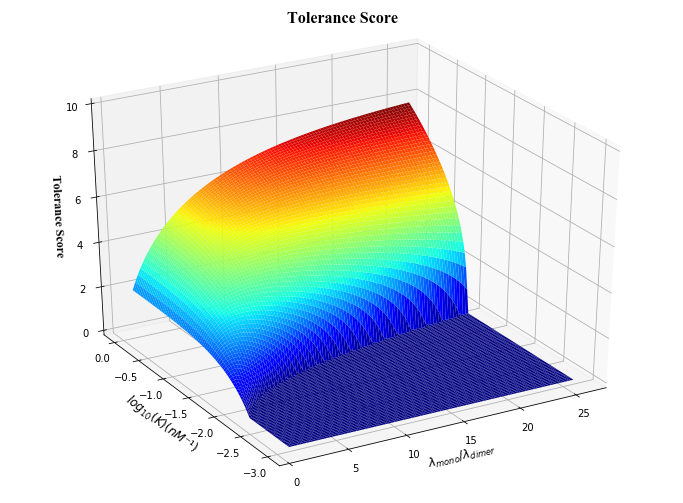

In [4]:
tolerance_score_heatmap3D(lam_min=0.027, lam_max=0.7, k_min=0.001, k_max=1, c2=10, offset=0, resolution=100)

# II. Controllability of Protein Complexes

Ref dimer amount:  3370.0139910019852


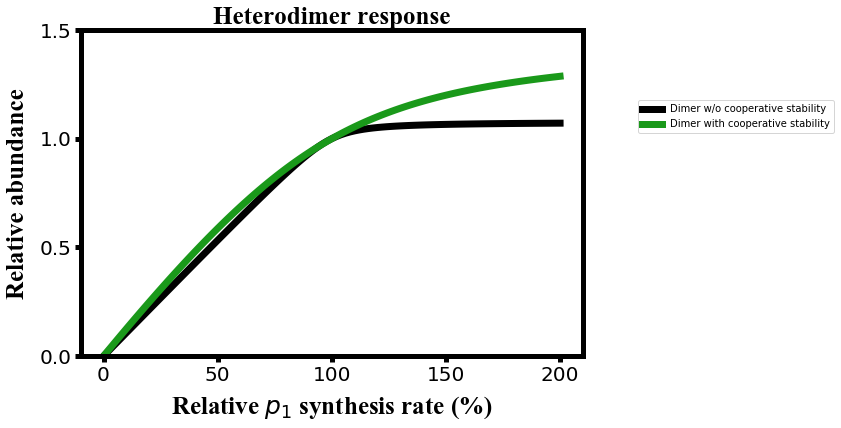

Control
Downward response (%):	 53.271108810280786
Upward response (%):	 106.55394704612887
With cooperative stability
Downward response (%):	 58.70639881422572
Upward response (%):	 119.9839590526792


In [5]:
draw_dimer_response(lam1=0.135, lam2=0.027, lam3=0.027, K=0.05, c2=98, fold=2, lam12_equal=True, normalize=True, compare=True)

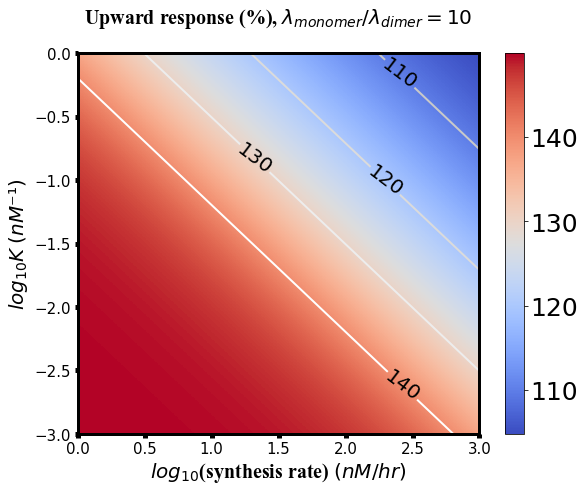

In [6]:
controllability_heatmap(lam1=0.27, lam3=0.027,c_min=1,c_max=1000,k_min=0.001,k_max=1,resolution1 = 500, resolution2=500, up=True)

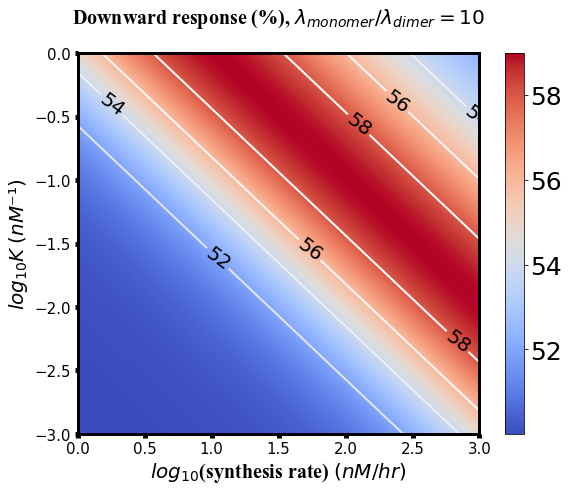

In [7]:
controllability_heatmap(lam1=0.27, lam3=0.027,c_min=1,c_max=1000,k_min=0.001,k_max=1,resolution1 = 500, resolution2=500, up=False)

(lam1, lam2, lam3, lam12, lam123)= (0.017, 0.017, 0.017, 0.017, 0.017)
Downward response (%):	 53.0222377049151
Upward response (%):	 105.606525396964
(lam1, lam2, lam3, lam12, lam123)= (0.13, 0.13, 0.13, 0.0735, 0.017)
Downward response (%):	 59.8838447637660
Upward response (%):	 119.003285456928


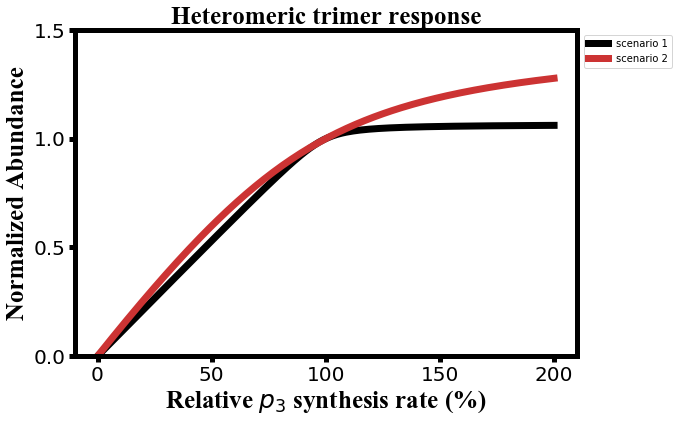

In [8]:
draw_trimer_response([scenario.stable, scenario.three], xmiddle=98, who='c3')

# III. Performance Comparison in Eight Characteristics  

In [9]:
open_circuit_performance = performance(open_circuit.dynamics)
closed_circuit_performance = performance(closed_circuit.dynamics)

## Run the simulations and save the data

### It takes several hours to run the simulations

In [ ]:
l = '_efficiency_n'
o_wo, o_with, c_wo, c_with = performance_ss(open_circuit_performance.efficiency, closed_circuit_performance.efficiency, 
               n=10, fc=1, l=l)
result_ls = [o_wo, o_with, c_wo, c_with]
for i in range(4):
    save_data('Simulated_data/'+variables.circuits[i]+l, result_ls[i])

l = '_ratio_n'
o_wo, o_with, c_wo, c_with = performance_ss(open_circuit_performance.dimer_ratio, closed_circuit_performance.dimer_ratio, 
               n=10, fc=1, l=l)
result_ls = [o_wo, o_with, c_wo, c_with]
for i in range(4):
    save_data('Simulated_data/'+variables.circuits[i]+l, result_ls[i])
    
l = '_ratio_2_n'
o_wo, o_with, c_wo, c_with = performance_ss(open_circuit_performance.dimer_ratio, closed_circuit_performance.dimer_ratio, 
               n=10, fc=2, l=l)
result_ls = [o_wo, o_with, c_wo, c_with]
for i in range(4):
    save_data('Simulated_data/'+variables.circuits[i]+l, result_ls[i])
    
l = '_downward_n'
o_wo, o_with, c_wo, c_with = performance_ss(open_circuit_performance.controllability, closed_circuit_performance.controllability, 
               n=10, fc=0.5, l=l)
result_ls = [o_wo, o_with, c_wo, c_with]
for i in range(4):
    save_data('Simulated_data/'+variables.circuits[i]+l, result_ls[i])
    
l = '_upward_n'
o_wo, o_with, c_wo, c_with = performance_ss(open_circuit_performance.controllability, closed_circuit_performance.controllability, 
               n=10, fc=2, l=l)
result_ls = [o_wo, o_with, c_wo, c_with]
for i in range(4):
    save_data('Simulated_data/'+variables.circuits[i]+l, result_ls[i])
    
l = '_turn_on_200_n'
o_wo, o_with, c_wo, c_with = performance_d(open_circuit_performance.turn_on, closed_circuit_performance.turn_on, 
               n=10, l=l)
result_ls = [o_wo, o_with, c_wo, c_with]
for i in range(4):
    save_data('Simulated_data/'+variables.circuits[i]+l, result_ls[i])
    
l = '_turn_off_n'
o_wo, o_with, c_wo, c_with = performance_d(open_circuit_performance.turn_off, closed_circuit_performance.turn_off, 
               n=10, l=l)
result_ls = [o_wo, o_with, c_wo, c_with]
for i in range(4):
    save_data('Simulated_data/'+variables.circuits[i]+l, result_ls[i])
    
l = '_recover_n'
o_wo, o_with, c_wo, c_with = performance_d(open_circuit_performance.recovery_time, closed_circuit_performance.recovery_time, 
               n=10, shot=5, l=l)
result_ls = [o_wo, o_with, c_wo, c_with]
for i in range(4):
    save_data('Simulated_data/'+variables.circuits[i]+l, result_ls[i])

## Read the simulated data

In [11]:
result_dict = {}
for i in variables.circuits:
    for j in variables.suffix_n:
        key = i + '_' + j
        filename = 'Simulated_data/' + key + '.txt'
        result = read_data(filename)
        result_dict[key] = result
        
circuit_name = ['owo', 'owith', 'cwo','cwith']
z = perm(circuit_name, 4)

ranking_ls = []
for i in z:
    ranking_ls.append(i)
    
global_variable = variables(result_dict, ranking_ls)

## Multiple comparison

In [12]:
for i in global_variable.suffix_n:
    globals()[i+'ls']=scores_for_radar(i, global_variable,normalize=True)

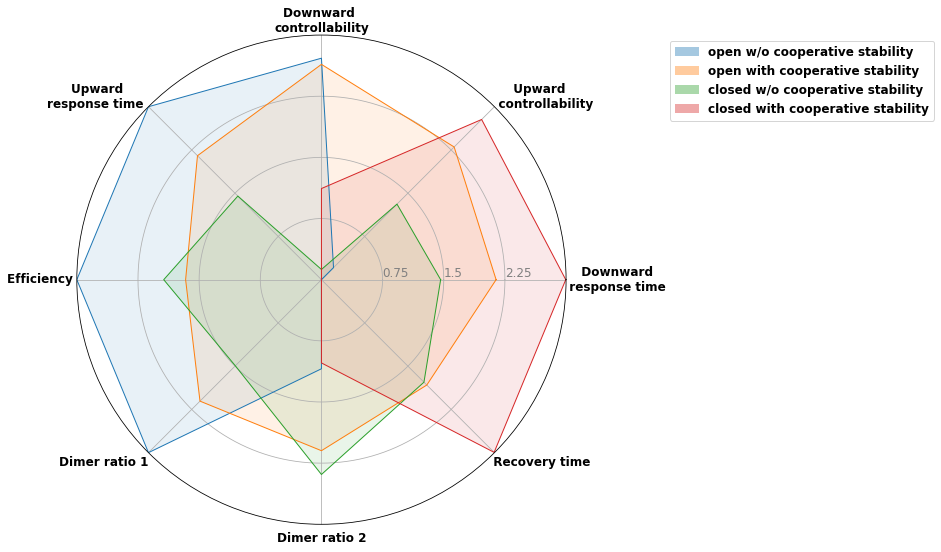

In [13]:
df = pd.DataFrame({
'circuits': ['open w/o cooperative stability','open with cooperative stability','closed w/o cooperative stability','closed with cooperative stability'],
'                  Downward\n                  response time': turn_off_nls,
'                  Upward \n                    controllability': upward_nls,
'Downward \ncontrollability': downward_nls,
'Upward                    \nresponse time                     ': turn_on_200_nls,
'Efficiency           ': efficiency_nls,
'Dimer ratio 1                 ': ratio_nls,
'Dimer ratio 2': ratio_2_nls,
'                  Recovery time': recover_nls
})

categories=list(df)[1:]
N = len(categories)

values_ls = []

for i in range(4):
    values1=df.loc[i].drop('circuits').values.flatten().tolist()
    values1 += values1[:1]
    values_ls.append(values1)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.subplots(figsize=(9,9))
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], categories, color='k', size=12, weight=600)
 

ax.set_rlabel_position(0)
plt.yticks([0.75, 1.5, 2.25], ["0.75","1.5","2.25"], color="grey", size=12)
plt.ylim(0,3)


for i in range(0,4):
    ax.plot(angles, values_ls[i], linewidth=1, linestyle='solid')
    ax.fill(angles, values_ls[i], alpha=0.1, label=df['circuits'][i])
        

legend_properties = {'weight':600, 'size':12}
leg = plt.legend(bbox_to_anchor=(1.2, 1), prop=legend_properties)
for i in leg.legendHandles:
    i.set_alpha(0.4)

plt.show()